# Research of ads for the sale of apartments

We have the data of the Yandex Real Estate service — an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. We need to learn how to determine the market value of real estate. The task is to set the parameters. This will allow us to build an automated system: it will track anomalies and fraudulent activity.

There are two types of data available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically based on cartographic data. For example, the distance to the center, the airport, the nearest park and reservoir.

##  Data Overview

Before we start, let's import libraries pandas, matplotlib and seaborn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    data = pd.read_csv('real_estate_data.csv', sep='\t' , decimal='.')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t' , decimal='.')

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


According to the data provided by colleagues, we will provide a transcript of the columns.

**airports_nearest** — distance to the nearest airport in meters (m)

**balcony** — number of balconies

**ceiling_height** — ceiling height (m)

**cityCenters_nearest** — distance to the city center (m)

**days_exposition** — how many days the ad was placed (from publication to withdrawal)

**first_day_exposition** — date of publication

**floor** — floor

**floors_total** — total floors in the house

**is_apartment** — apartments (boolean type)

**kitchen_area** — kitchen area in square meters (m2)

**last_price** — price at the time of withdrawal from publication

**living_area** — living area in square meters (m2)

**locality_name** — name of the locality

**open_plan** — free layout (boolean type)

**parks_around3000** — number of parks within a radius of 3 km

**parks_nearest** — distance to the nearest park (m)

**ponds_around3000** — the number of reservoirs within a radius of 3 km

**ponds_nearest** — distance to the nearest reservoir (m)

**rooms** — number of rooms

**studio** — studio apartment (boolean type)

**total_area** — the area of the apartment in square meters (m2)

**total_images** — the number of photos of the apartment in the ad

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

## Data preprocessing

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

To begin with, let's pay attention to the balcony column. About half of the data is missing. Let's check which values occur in this column.

In [5]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Probably the presence of passes is due to the fact that the proposed property does not have balconies. Therefore, these values can be replaced with 0.

In [6]:
data['balcony'] = data['balcony'].fillna(0)

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In the presented table, the column is_apartment, which is described as Boolean, but is defined as object. Let's check the unique values in this column.

In [8]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Replace the missing values with `False`.

In [9]:
data['is_apartment'].fillna('False')
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Let's check 'ceiling_height' column.

In [10]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In this column there are abnormal values that are knocked out of all data (from 10 to 100). Let's check their number.

In [11]:
data.groupby('ceiling_height')['ceiling_height'].count()

ceiling_height
1.00       1
1.20       1
1.75       1
2.00      11
2.20       1
          ..
26.00      1
27.00      8
27.50      1
32.00      2
100.00     1
Name: ceiling_height, Length: 183, dtype: int64

Abnormal values are quite rare. At this stage, we will not replace them, as they may be useful in further analysis in charts and histograms. Since the data spread is quite large, we will replace the missing values with median values.

In [12]:
med_height = data['ceiling_height'].median() 
data['ceiling_height'] = data['ceiling_height'].fillna(med_height) 

Let's check 'locality_name' column.

In [13]:
data.groupby('locality_name')['locality_name'].count()

locality_name
Бокситогорск             16
Волосово                 36
Волхов                  111
Всеволожск              398
Выборг                  237
                       ... 
село Путилово             2
село Рождествено          3
село Русско-Высоцкое      9
село Старая Ладога        2
село Шум                  1
Name: locality_name, Length: 364, dtype: int64

In [14]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

As there are 49 missing values in this column, we will lure the omissions to the value "Другое"

In [15]:
data['locality_name'] = data['locality_name'].fillna('Другое')

In [16]:
data['locality_name'] = data['locality_name'].replace('посёлок Пансионат Зелёный Бор', 'поселок Пансионат Зелёный Бор')

Let's check 'floors_total' column.

In [17]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

So the missing values represent a small fraction, let's get rid of them.

In [18]:
data = data.dropna(subset= ['floors_total']) 
data['floors_total'].unique() 

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., 20., 28.,
       36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

We will not change the remaining columns with missing values yet, as their contribution is quite high. Let's check for obvious duplicates and, if necessary, get rid of them.

In [19]:
data.duplicated().sum()

0

After analyzing the table, we see that part of the data has incorrect type: the maximum number of floors (it needs to be converted to an integer format), whether it is an apartment (it needs to be converted to a Boolean type, and it is specified in the table as object) Therefore, we will bring some columns to the correct data type.

In [20]:
data['floors_total'] = data['floors_total'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  int64  
 7   living_area           21743 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          21382 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23613 non-null  object 
 15  airports_nearest      18

In [21]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,True,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,True,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,True,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,NaN,9,True,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,True,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Conclusion

Based on the results of data preprocessing, the missing values in a number of columns were replaced. Depending on the data type, the missing values were replaced with the mean/median, 0, or deleted. The omissions in this case could be caused by both the human factor and the specifics of data downloading.

In the remaining columns, empty values have not been deleted/replaced, as in the future this may affect the final result in data analysis.

## Calculations and adding results to the table

Before conducting data analysis, we will add the following information to the table: the price per square meter; the day of the week, month and year of publication of the announcement; the floor of the apartment; options — first, last, other; the ratio of residential and total area, as well as the ratio of the kitchen area to the total.

Add to the table the columns price_for_sq_meter (price per square meter), living_sq_share (ratio of total and living area), kitchen_sq_share (ratio of kitchen area to total)

In [22]:
data['price_for_sq_meter'] = data['last_price']/data['total_area']
data['living_sq_share'] = data['living_area']/data['total_area']
data['kitchen_sq_share'] = data['kitchen_area']/data['total_area']

In [24]:

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data['day'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_sq_meter,living_sq_share,kitchen_sq_share,day,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.370370,0.472222,0.231481,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.792079,0.460396,0.272277,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.714286,0.612500,0.148214,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,True,...,84.0,3.0,234.0,424.0,408176.100629,NaN,NaN,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.000000,0.320000,0.410000,1,6,2018


Here is the categorization of data by floor. Let's choose 3 main categories:

- the first

- the last one

- other

In [25]:

def floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    try:
        if floor == 1:
            return 'первый'
        elif floor == floors_total:
            return 'последний'
        else:
            return 'другое'
    except:
        return 'error'

In [26]:
data['type_floor'] = data.apply(floor_category, axis = 1)
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_sq_meter,living_sq_share,kitchen_sq_share,day,month,year,type_floor
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,2.0,755.0,NaN,120370.370370,0.472222,0.231481,3,3,2019,другое
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,True,...,0.0,NaN,81.0,82920.792079,0.460396,0.272277,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,True,...,2.0,574.0,558.0,92785.714286,0.612500,0.148214,3,8,2015,другое
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,True,...,3.0,234.0,424.0,408176.100629,NaN,NaN,4,7,2015,другое
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,1.0,48.0,121.0,100000.000000,0.320000,0.410000,1,6,2018,другое
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,True,...,NaN,NaN,55.0,95065.789474,0.473684,0.299342,0,9,2018,другое
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,True,...,0.0,NaN,155.0,99195.710456,0.284182,0.386059,3,11,2017,другое
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,NaN,22,True,...,0.0,NaN,NaN,110544.692737,NaN,0.263966,3,4,2019,другое
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,True,...,NaN,NaN,189.0,87454.764777,0.465320,0.265682,2,5,2018,другое
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,0.0,NaN,289.0,88524.590164,0.714754,0.106557,6,2,2017,другое


### Conclusion

According to the results of the calculations, new columns were added to the original table, namely the square meter area, the ratio of living space to total, the ratio of kitchen area to total, the date of sale, broken down by days, months, years.

These methods allow for a more in-depth analysis of determining the factors affecting the cost of housing.

## Data exploration

***We will study the following parameters: area, price, number of rooms, ceiling height. Let's build a histogram for each parameter***

In [ ]:
data['total_area'].describe()

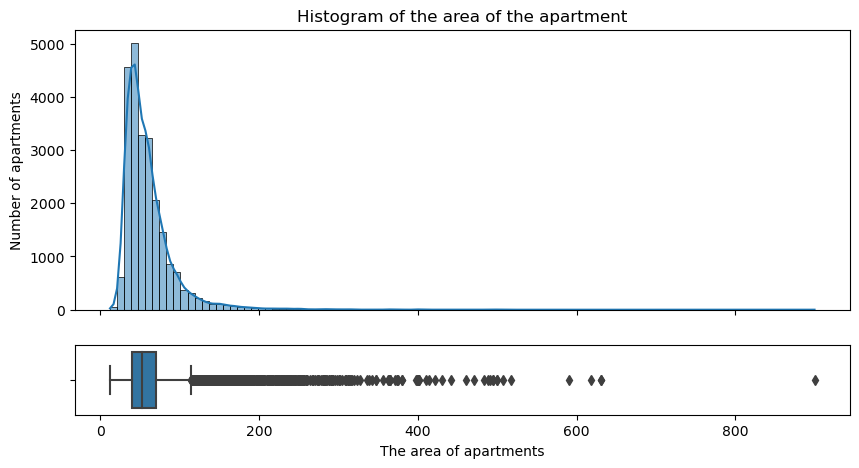

In [27]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(10, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=data, x='total_area',bins = 100, 
             kde=True, ax=axs_hist)\
.set(title='Histogram of the area of the apartment',
     ylabel='Number of apartments')
sns.boxplot(data=data, x='total_area', ax=axs_box)\
.set(xlabel='The area of apartments');

There are emissions after 200 m2, so we will limit the area to 200 m2.

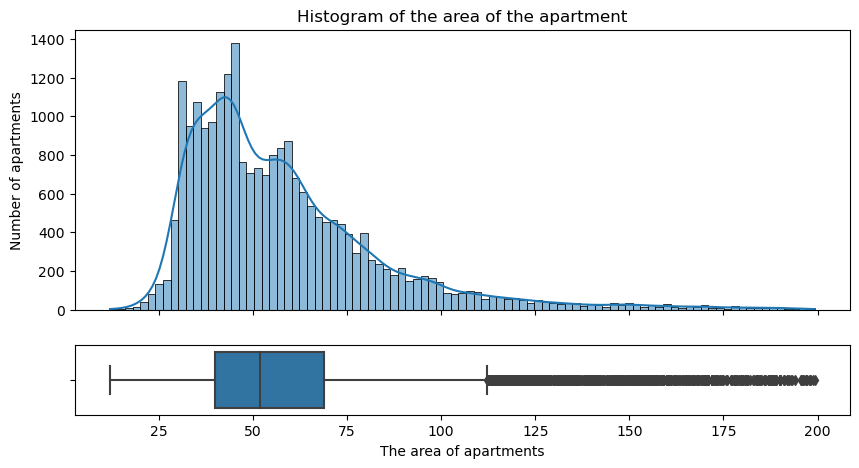

In [28]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(10, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=data[data['total_area'] < 200], x='total_area', 
             kde=True, ax=axs_hist)\
.set(title='Histogram of the area of the apartment',
     ylabel='Number of apartments')
sns.boxplot(data=data[data['total_area'] < 200], x='total_area', ax=axs_box)\
.set(xlabel='The area of apartments');

According to preliminary data, apartments with an area of 30 to 70 m2 are most often found. At the same time, about 50 m2 are most often found.

In [ ]:
data['last_price'].describe()

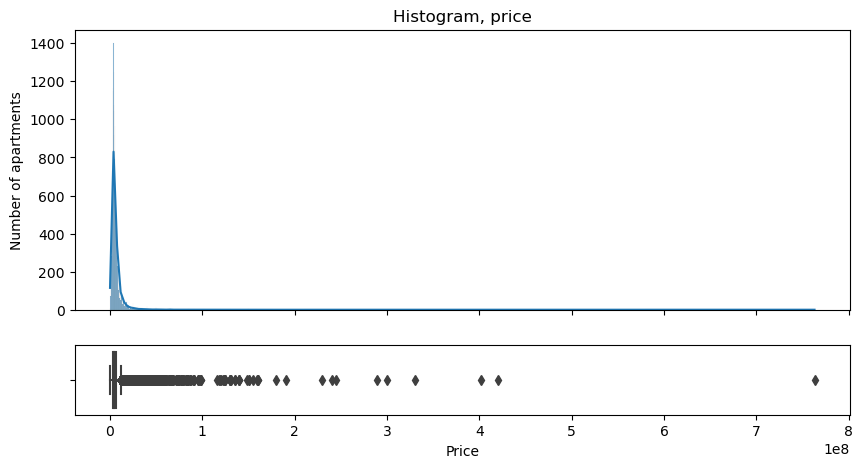

In [29]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(10, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=data, x='last_price',
             kde=True, ax=axs_hist)\
.set(title='Histogram, price',
     ylabel='Number of apartments')
sns.boxplot(data=data, x='last_price', ax=axs_box)\
.set(xlabel='Price');

<Axes: >

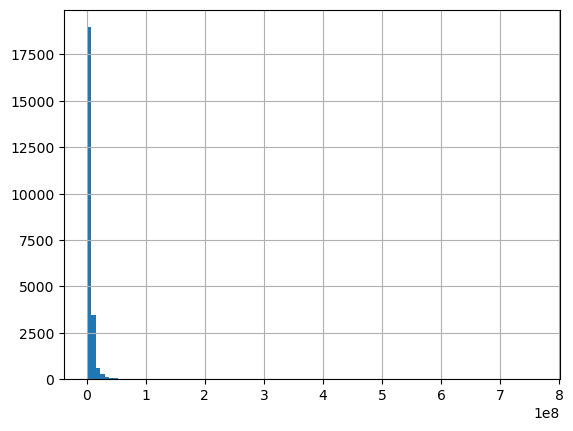

In [30]:

data['last_price'].hist(bins = 100)

Let's try to zoom out.

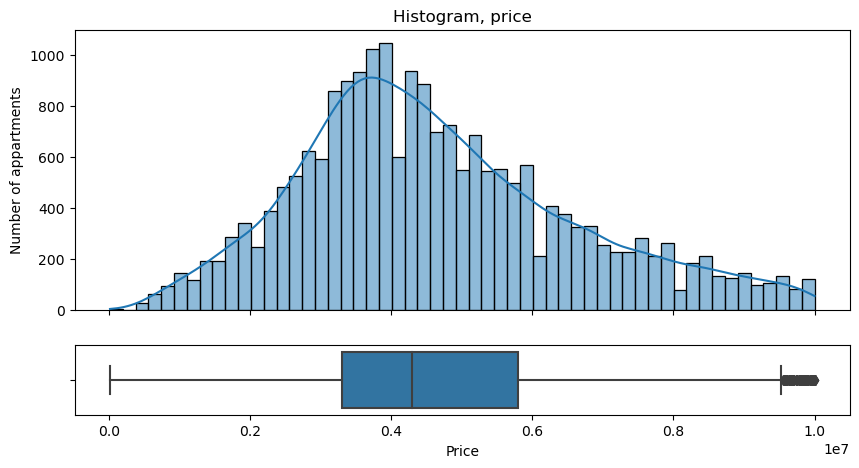

In [31]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(10, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=data[data['last_price'] < 1e7], x='last_price', 
             kde=True, ax=axs_hist)\
.set(title='Histogram, price',
     ylabel='Number of appartments')
sns.boxplot(data=data[data['last_price'] < 1e7], x='last_price', ax=axs_box)\
.set(xlabel='Price');

The average cost of an apartment is from 3 to 6 million.

In [32]:
data['rooms'].describe()

count    23613.000000
mean         2.071147
std          1.078380
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [33]:
len(data['rooms'].unique())

17

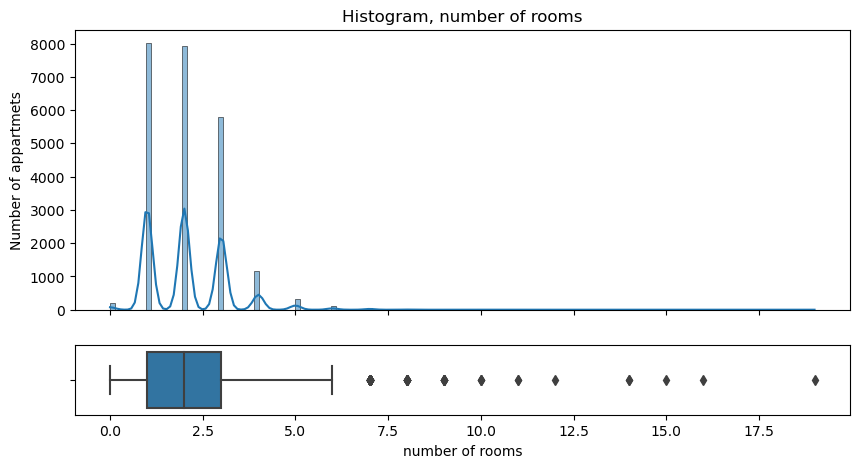

In [34]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(10, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=data, x='rooms', 
             kde=True, ax=axs_hist)\
.set(title='Histogram, number of rooms',
     ylabel='Number of appartmets')
sns.boxplot(data=data, x='rooms', ax=axs_box)\
.set(xlabel='number of rooms');

Most often there are 1, 2, 3 bedroom apartments, other options are less common.

In [35]:
data['ceiling_height'].describe()

count    23613.000000
mean         2.724581
std          0.990085
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

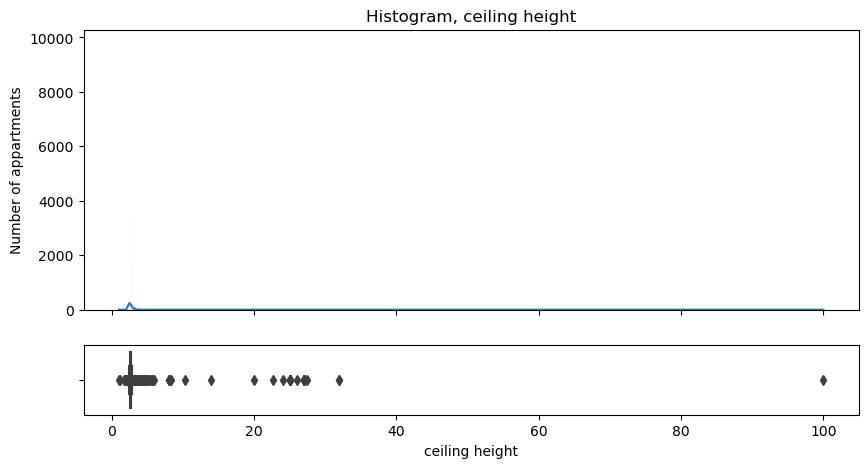

In [36]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(10, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=data, x='ceiling_height', 
             kde=True, ax=axs_hist)\
.set(title='Histogram, ceiling height',
     ylabel='Number of appartments')
sns.boxplot(data=data, x='ceiling_height', ax=axs_box)\
.set(xlabel='ceiling height');

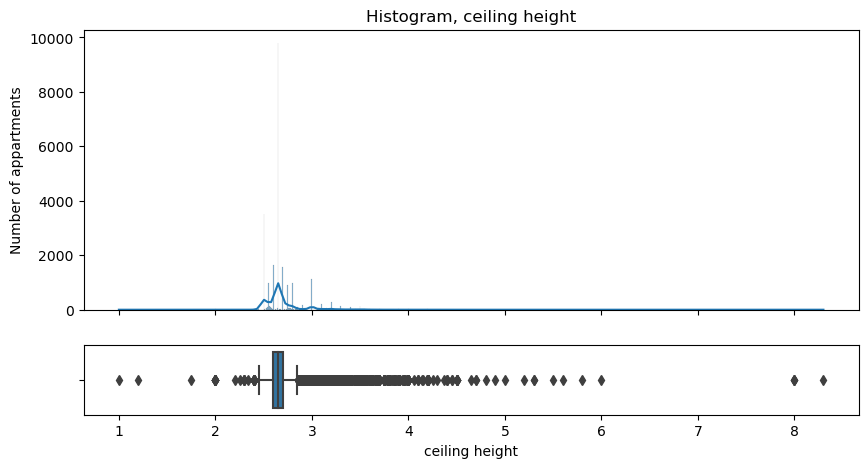

In [38]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(10, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=data[data['ceiling_height'] <10], x='ceiling_height', 
             kde=True, ax=axs_hist)\
.set(title='Histogram, ceiling height',
     ylabel='Number of appartments')
sns.boxplot(data=data[data['ceiling_height'] <10], x='ceiling_height', ax=axs_box)\
.set(xlabel='ceiling height');

Most often there are apartments with a ceiling height of about 2.7 m.

Let's check how much time it takes to sell an apartment.

In [ ]:
data['days_exposition'].describe()

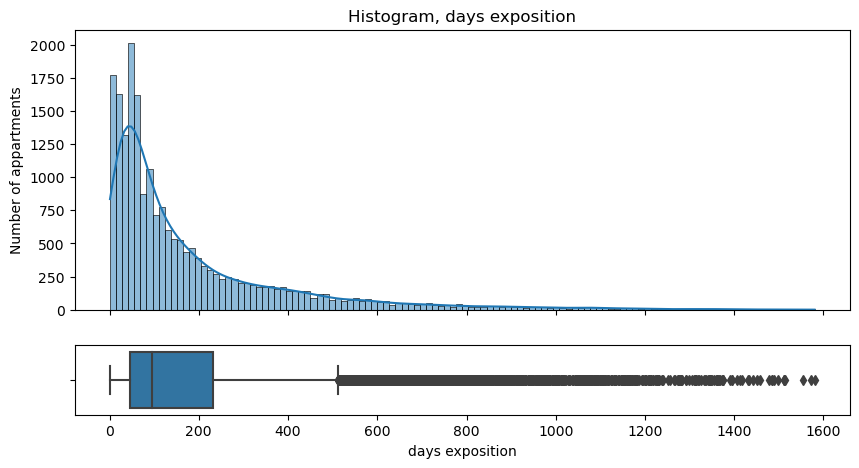

In [40]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(10, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=data, x='days_exposition', 
             kde=True, ax=axs_hist)\
.set(title='Histogram, days exposition',
     ylabel='Number of appartments')
sns.boxplot(data=data, x='days_exposition', ax=axs_box)\
.set(xlabel='days exposition');

Let's calculate median value.

In [41]:
data['days_exposition'].mean()

180.88483929357665

The average value of the sale time is 180 days, the median is 95 days.

Quick sale = 45 days.
Slow sale = 232 days.
At the same time, it is worth noting that the time of sale of an apartment in 1 day and more than 800 days looks abnormal. If the number of days after 1000 becomes less, then there is a lot of data for about 1 day. Let's check the share of sales for 1 day.

In [42]:
display(len(data.query('days_exposition == 1')) / len(data))

4.234955321221361e-05

The data is significantly less than 1 %. Let's check the combinations of slices in which the abnormal values will not exceed 1%, so as not to violate the integrity of the picture.

In [43]:
display(len(data.query('days_exposition >= 1 and days_exposition <= 2')) / len(data))

0.00016939821284885445

In [44]:
display(len(data.query('days_exposition >= 1 and days_exposition <= 3')) / len(data))

0.00016939821284885445

In [45]:
display(len(data.query('days_exposition >= 1 and days_exposition <= 4')) / len(data))

0.014271799432515987

When the data cut from 1 to 3 days is less than 1%. Let's assume that this is an outlier and get rid of it. We also see in the original histogram that the values after 1400 are practically indistinguishable. Therefore, we will limit our data from 3 to 1400 days and then build updated histograms.

<Axes: >

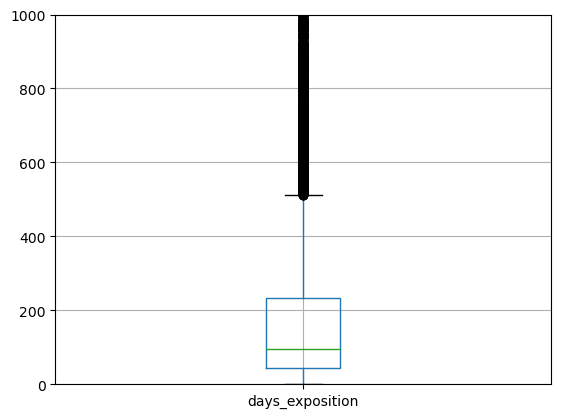

In [46]:
plt.ylim(0,1000)
data.boxplot('days_exposition')

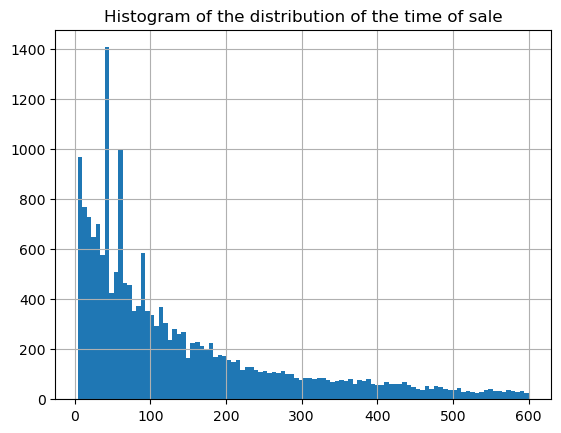

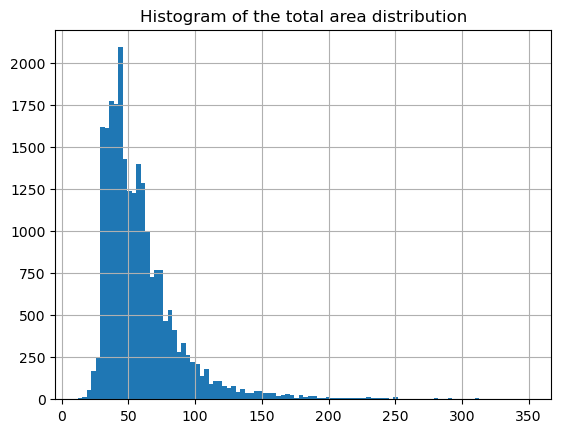

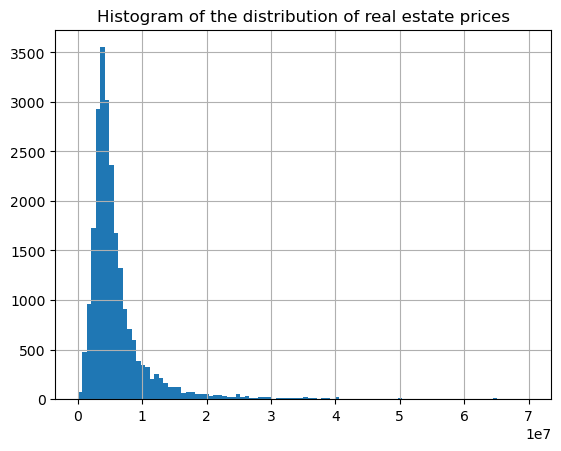

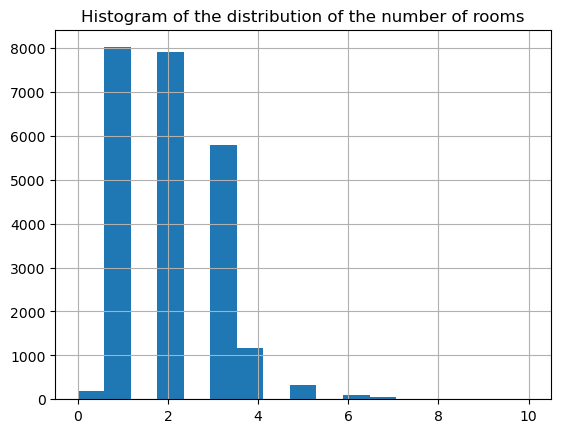

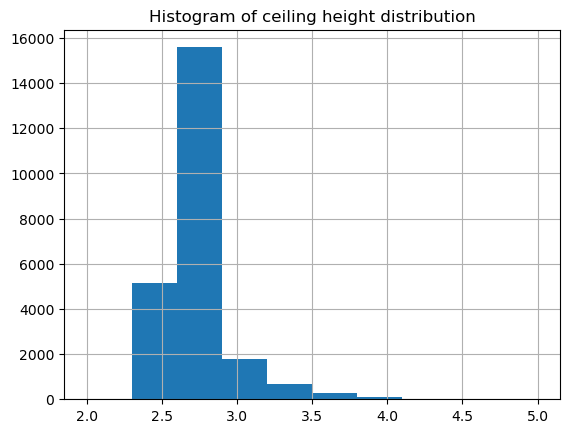

In [47]:
data['days_exposition'].hist(bins = 100, range = (4,600))
plt.title('Histogram of the distribution of the time of sale')
plt.show()
data['total_area'].hist(bins = 100,range=(12,350))
plt.title('Histogram of the total area distribution')
plt.show()
data['last_price'].hist(bins = 100, range = (0, 7e7))
plt.title('Histogram of the distribution of real estate prices')
plt.show()
data['rooms'].hist(bins = 17,range=(0,10))
plt.title('Histogram of the distribution of the number of rooms')
plt.show()
data['ceiling_height'].hist(bins = 10,range=(2,5))
plt.title('Histogram of ceiling height distribution')
plt.show()

In [48]:
data[['days_exposition', 'total_area', 'last_price', 'rooms','ceiling_height']].describe()

,days_exposition,total_area,last_price,rooms,ceiling_height
count,20441.000000,23613.000000,2.361300e+04,23613.000000,23613.000000
mean,180.884839,60.340678,6.540555e+06,2.071147,2.724581
std,219.685543,35.648988,1.090172e+07,1.078380,0.990085
min,1.000000,12.000000,1.219000e+04,0.000000,1.000000
25%,45.000000,40.000000,3.400000e+06,1.000000,2.600000
50%,95.000000,52.000000,4.650000e+06,2.000000,2.650000
75%,232.000000,69.800000,6.799000e+06,3.000000,2.700000
max,1580.000000,900.000000,7.630000e+08,19.000000,100.000000


***Let's check whether the price depends on the area, number of rooms, distance from the center****


In [ ]:
print(data['last_price'].corr(data['total_area'])) 
print(data['last_price'].corr(data['rooms'])) 
print(data['last_price'].corr(data['cityCenters_nearest'])) 

There is a weak linear relationship between the price and the area of the apartment. At the same time, there is practically no linear dependence of the price on the number of rooms or with each other. Additionally, we will check these dependencies by plotting graphs.
    

Text(0, 0.5, 'Average price')

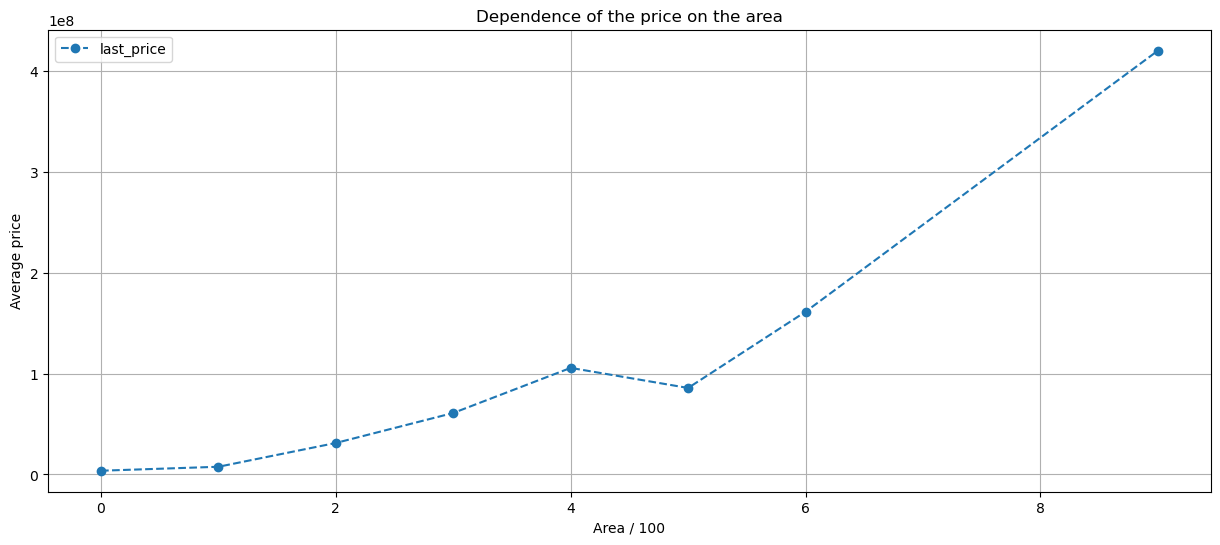

In [49]:
df = data.copy()

df.total_area = (df.total_area / 100).round()

df.pivot_table(index='total_area', values='last_price', aggfunc='mean').plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Dependence of the price on the area')
plt.xlabel('Area / 100')
plt.ylabel('Average price')

The plot shows that with an increase in the area of real estate, the average price increases. The larger the area, the more expensive the property.

Now let's check the relationship between the price of real estate and the number of rooms.

Text(0, 0.5, 'Average price')

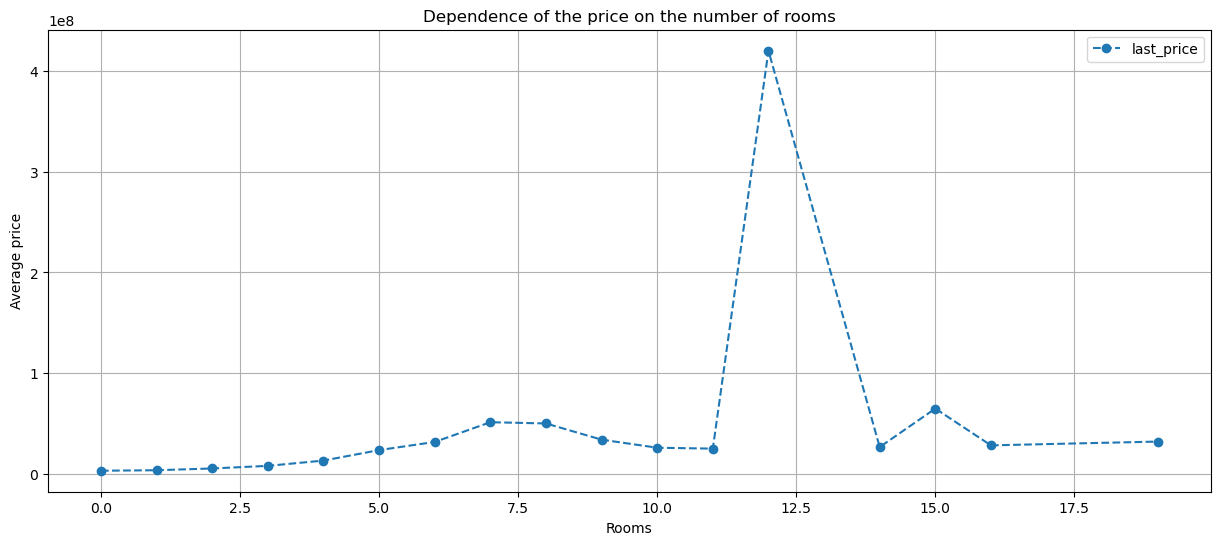

In [50]:
df_1 = data.copy()

df_1.pivot_table(index='rooms', values='last_price', aggfunc='mean').plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Dependence of the price on the number of rooms')
plt.xlabel('Rooms')
plt.ylabel('Average price')

With an increase in the number of rooms, there is a trend towards an increase in the price of an apartment. In this case, there is an abnormal value of an apartment of 12 rooms, but it is rather an abnormal value, or a very suspicious property.

Let's check the relationship between the price of real estate and the distance to the center.

Text(0, 0.5, 'Average price')

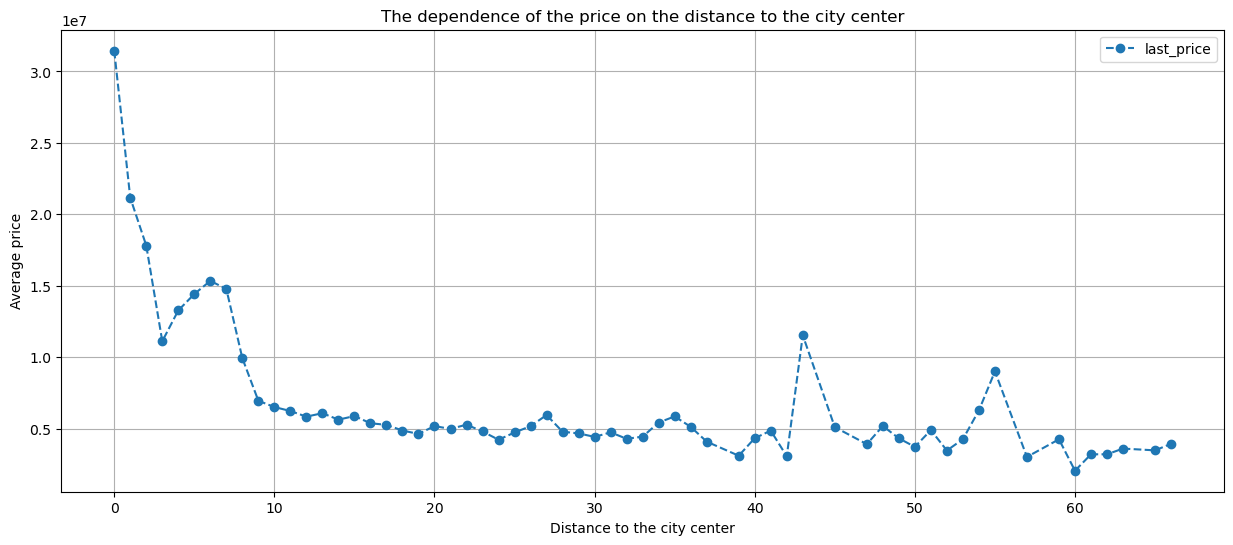

In [52]:
df_2 = data.copy()

df_2.cityCenters_nearest = (df.cityCenters_nearest / 1000).round() 

df_2.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='mean').plot(style='o--', figsize=(15, 6), grid=True)

plt.title('The dependence of the price on the distance to the city center')
plt.xlabel('Distance to the city center')
plt.ylabel('Average price')

The graph shows that the closer the property is to the city center, the higher its cost. A particularly sharp increase is observed at a distance of less than 7 km. It can be assumed that the radius of the city center is about 7 km.

***Let's check the dependence of the price on which floor the apartment is located on: the first, last or other.***

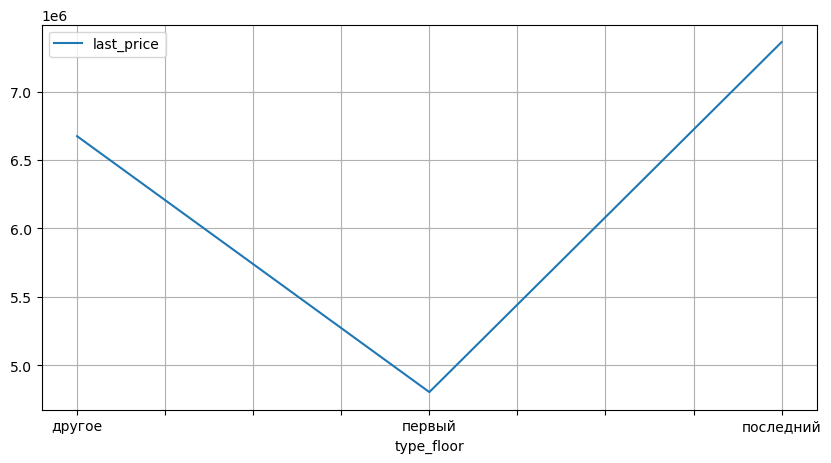

In [53]:
(
    data.pivot_table(index='type_floor', values='last_price')
    .plot(grid=True, figsize=(10, 5))
) 

plt.show()

Conclusion. Apartments on the ground floor are the cheapest. at the same time, apartments on the top floor are the most expensive.

***Let's check the dependence of the price on the date of placement: day of the week, month and year.***

In [54]:
print(data['last_price'].corr(data['day'])) 
print(data['last_price'].corr(data['month'])) 
print(data['last_price'].corr(data['year'])) 

0.0012947242289498427
0.00276523265748841
-0.04302312009925644


There is no linear dependence on the date. It is necessary to check this dependence by plotting graphs.

Text(0, 0.5, 'Average price')

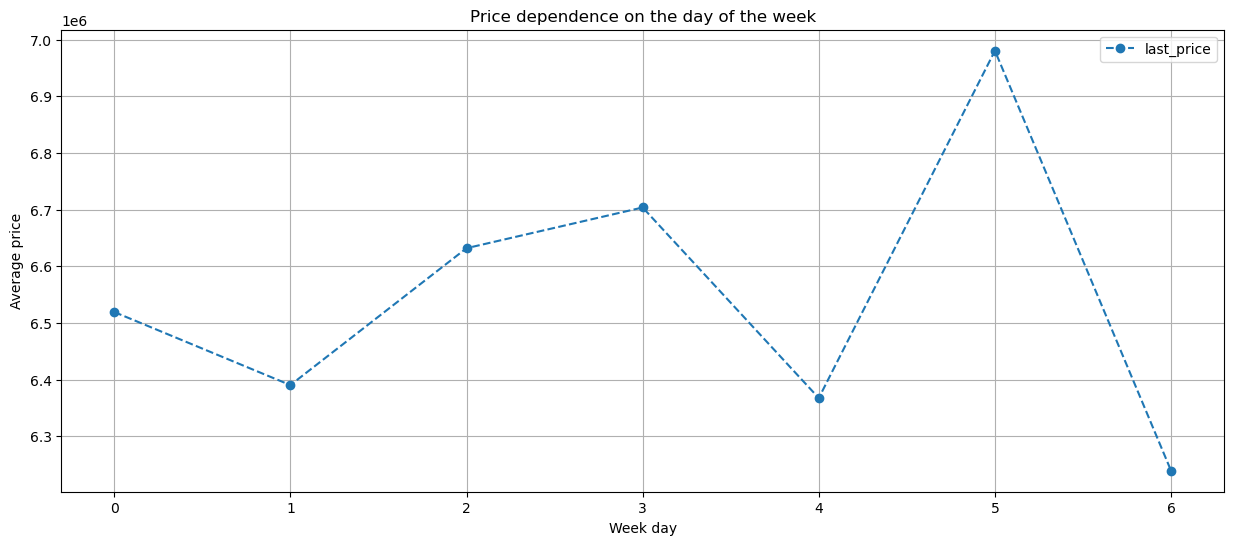

In [55]:
df_3 = data.copy() 

df_3.pivot_table(index='day', values='last_price', aggfunc='mean').plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Price dependence on the day of the week')
plt.xlabel('Week day')
plt.ylabel('Average price')

Text(0, 0.5, 'Average price')

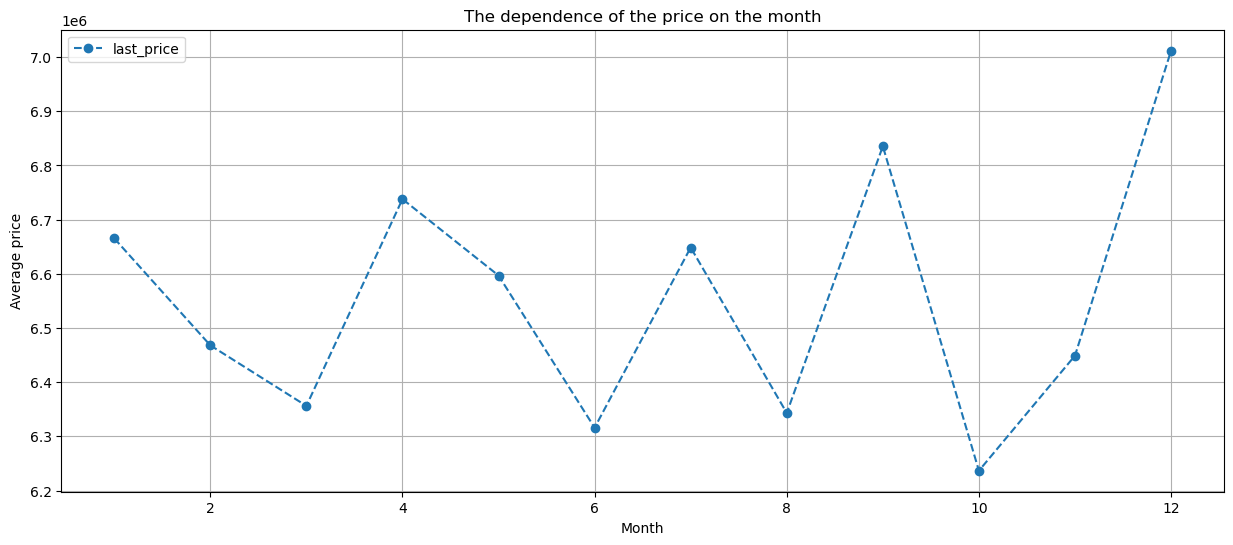

In [56]:
df_4 = data.copy() 

df_4.pivot_table(index='month', values='last_price', aggfunc='mean').plot(style='o--', figsize=(15, 6), grid=True)

plt.title('The dependence of the price on the month')
plt.xlabel('Month')
plt.ylabel('Average price')

Text(0, 0.5, 'Average price')

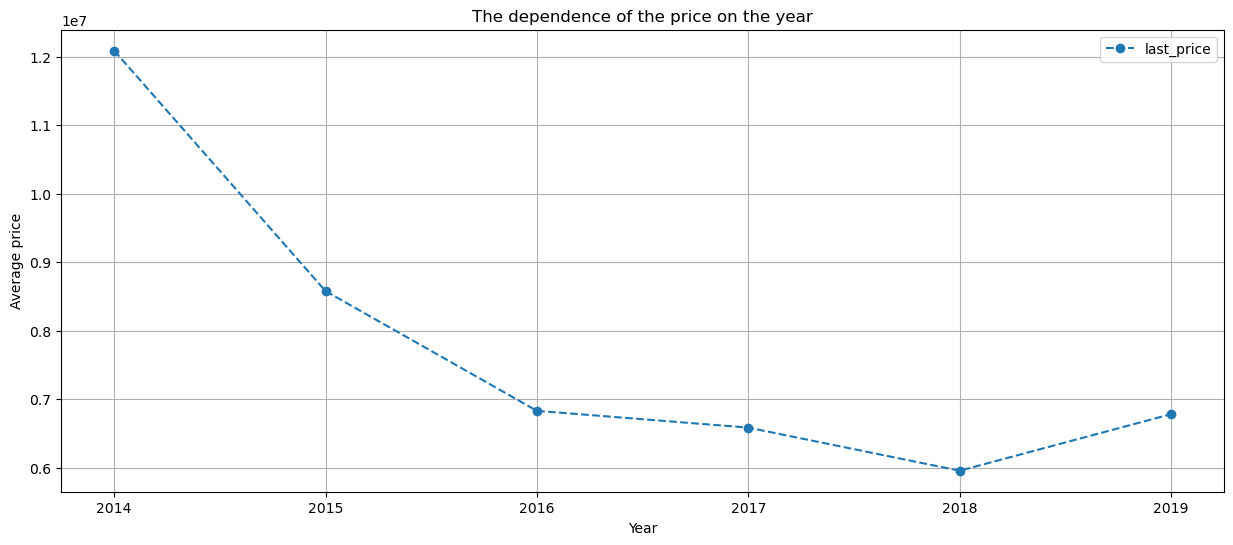

In [57]:
df_5 = data.copy() 

df_4.pivot_table(index='year', values='last_price', aggfunc='mean').plot(style='o--', figsize=(15, 6), grid=True)

plt.title('The dependence of the price on the year')
plt.xlabel('Year')
plt.ylabel('Average price')

As a result:

1) Ads which were placed on Saturday - have the maximum price. Also, real estate has a high price, the ads for the sale of which were posted on Wednesday and Thursday.

2) From 2014 to 2018, the average price of real estate is declining. At the same time, a slight increase in the average price is observed from 2018 to 2019.

3) The highest prices are given in the month of December. At the same time, in the remaining months, the average price of real estate constantly fluctuates with an interval of 2-3 months.

***Let's check 10 localities with the largest number of ads.
Calculate the average price per square meter in these localities. Select the localities with the highest and lowest cost of housing.***

In [58]:
data.pivot_table(index ='locality_name', 
                 values = 'price_for_sq_meter', 
                 aggfunc ={'mean' , 'count'}).sort_values(by='count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,15651,114868.877341
посёлок Мурино,520,85673.259928
посёлок Шушары,439,78551.344545
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
посёлок Парголово,327,90175.913458
Гатчина,307,68746.146763
деревня Кудрово,299,92473.547576


Conclusion. The largest number of ads for sale are presented in Санкт-Петербург. Санкт-Петербург also has the highest cost per square meter.
At the same time, the lowest cost of housing is represented in Выборг.

***Let's check the cost of housing based on the distance from the city center.***

First of all, we will add 'the distance to the center' column (in kilometers) to the table and make it as an integer value. To begin with, we will create a separate table for Санкт-Петербург.


In [59]:
data_spb = data.query('locality_name == "Санкт-Петербург"').copy()
data_spb['cityCenters_nearest_km'] = data_spb['cityCenters_nearest']/1000

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_sq_meter,living_sq_share,kitchen_sq_share,day,month,year,type_floor
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,2.0,755.0,NaN,120370.370370,0.472222,0.231481,3,3,2019,другое
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,0.0,NaN,81.0,82920.792079,0.460396,0.272277,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,2.0,574.0,558.0,92785.714286,0.612500,0.148214,3,8,2015,другое
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,True,...,3.0,234.0,424.0,408176.100629,NaN,NaN,4,7,2015,другое
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,1.0,48.0,121.0,100000.000000,0.320000,0.410000,1,6,2018,другое


<Axes: xlabel='cityCenters_nearest_km'>

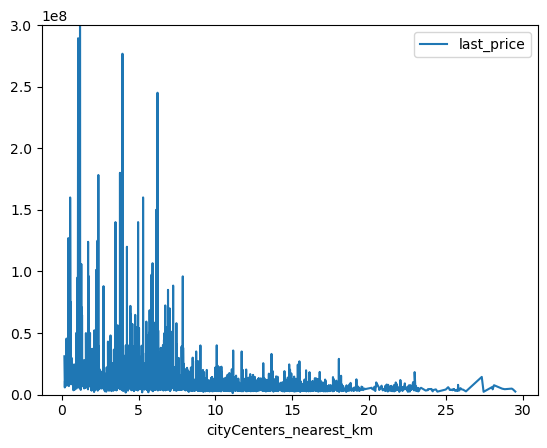

In [60]:
data_spb.pivot_table(index = 'cityCenters_nearest_km', 
                     values = 'last_price', 
                     aggfunc = 'mean').reset_index().plot(x = 'cityCenters_nearest_km', y = 'last_price', ylim = (0, 3e8))

Conclusion. The radius of the center is approximately 7 km, because the highest real estate prices are contained inside.

***Let's analyze the segment of apartments in the center of Санкт-Петербург.***


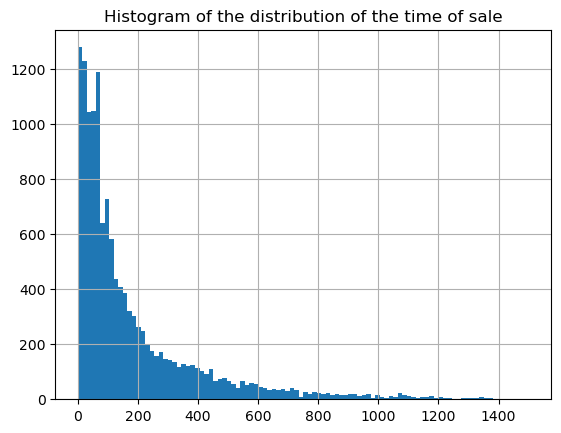

In [61]:
data_spb['days_exposition'].hist(bins = 100, range = (0,1500))
plt.title('Histogram of the distribution of the time of sale')
plt.show()

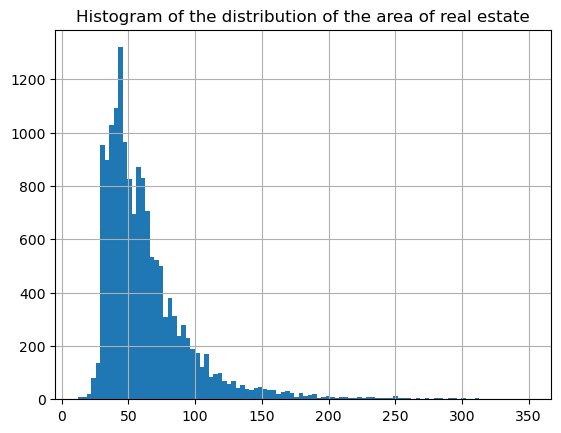

In [62]:
data_spb['total_area'].hist(bins = 100,range=(12,350))
plt.title('Histogram of the distribution of the area of real estate')
plt.show()

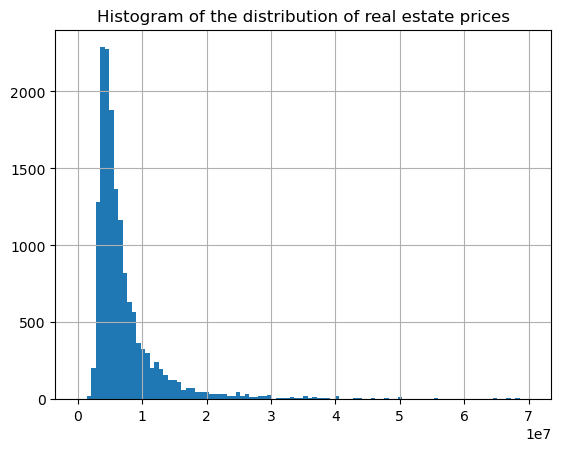

In [63]:
data_spb['last_price'].hist(bins = 100, range = (0, 7e7))
plt.title('Histogram of the distribution of real estate prices')
plt.show()

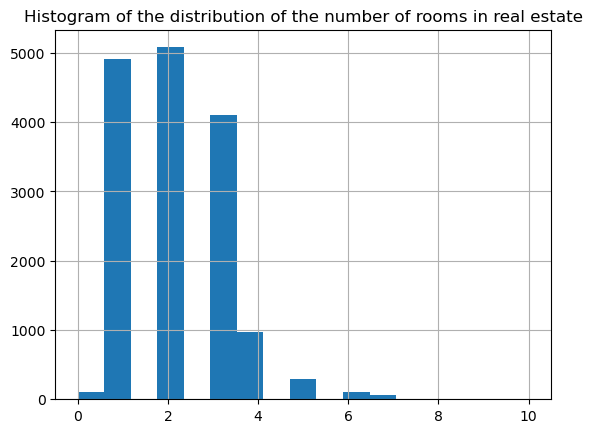

In [64]:
data_spb['rooms'].hist(bins = 17,range=(0,10))
plt.title('Histogram of the distribution of the number of rooms in real estate')
plt.show()

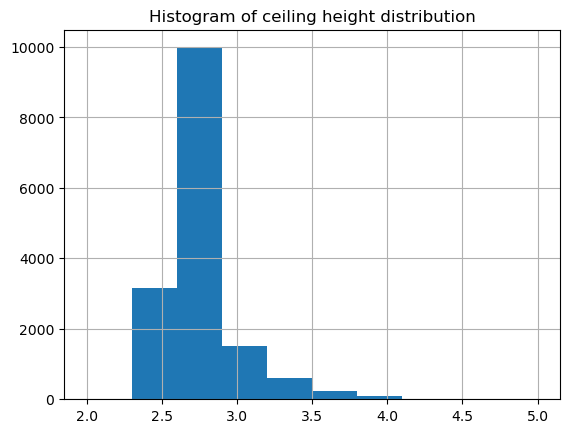

In [65]:
data_spb['ceiling_height'].hist(bins = 10,range=(2,5))
plt.title('Histogram of ceiling height distribution')
plt.show()

In [66]:
data_spb[['days_exposition', 'total_area', 'last_price', 'rooms','ceiling_height']].describe()

,days_exposition,total_area,last_price,rooms,ceiling_height
count,13577.000000,15651.000000,1.565100e+04,15651.000000,15651.000000
mean,182.726965,64.746341,8.064895e+06,2.172385,2.749159
std,224.606142,40.426740,1.303626e+07,1.148437,1.044616
min,1.000000,12.000000,1.219000e+04,0.000000,1.000000
25%,42.000000,42.000000,4.200000e+06,1.000000,2.600000
50%,95.000000,55.000000,5.500000e+06,2.000000,2.650000
75%,231.000000,74.550000,8.150000e+06,3.000000,2.750000
max,1572.000000,900.000000,7.630000e+08,19.000000,100.000000


In [67]:
data[['days_exposition', 'total_area', 'last_price', 'rooms','ceiling_height']].describe()

,days_exposition,total_area,last_price,rooms,ceiling_height
count,20441.000000,23613.000000,2.361300e+04,23613.000000,23613.000000
mean,180.884839,60.340678,6.540555e+06,2.071147,2.724581
std,219.685543,35.648988,1.090172e+07,1.078380,0.990085
min,1.000000,12.000000,1.219000e+04,0.000000,1.000000
25%,45.000000,40.000000,3.400000e+06,1.000000,2.600000
50%,95.000000,52.000000,4.650000e+06,2.000000,2.650000
75%,232.000000,69.800000,6.799000e+06,3.000000,2.700000
max,1580.000000,900.000000,7.630000e+08,19.000000,100.000000


Conclusion. The overall median values are available in columns for the time of placement of ads, the number of rooms and ceiling height.

It is important to note that:

1) The median price for an apartment is higher by 0.85 million rubles.

2) The median value of the total area is 3 m ^2 more, compared to real estate outside the center of Санкт-Петербург.

Let's check whether the following factors affect the cost of the apartment (number of rooms, floor, distance from the center, date of placement of the add)

,last_price,ceiling_height,rooms,total_area,floor
last_price,1.000000,0.066417,0.372108,0.657090,-0.000586
ceiling_height,0.066417,1.000000,0.055934,0.086755,-0.021397
rooms,0.372108,0.055934,1.000000,0.758668,-0.161592
total_area,0.657090,0.086755,0.758668,1.000000,-0.037311
floor,-0.000586,-0.021397,-0.161592,-0.037311,1.000000


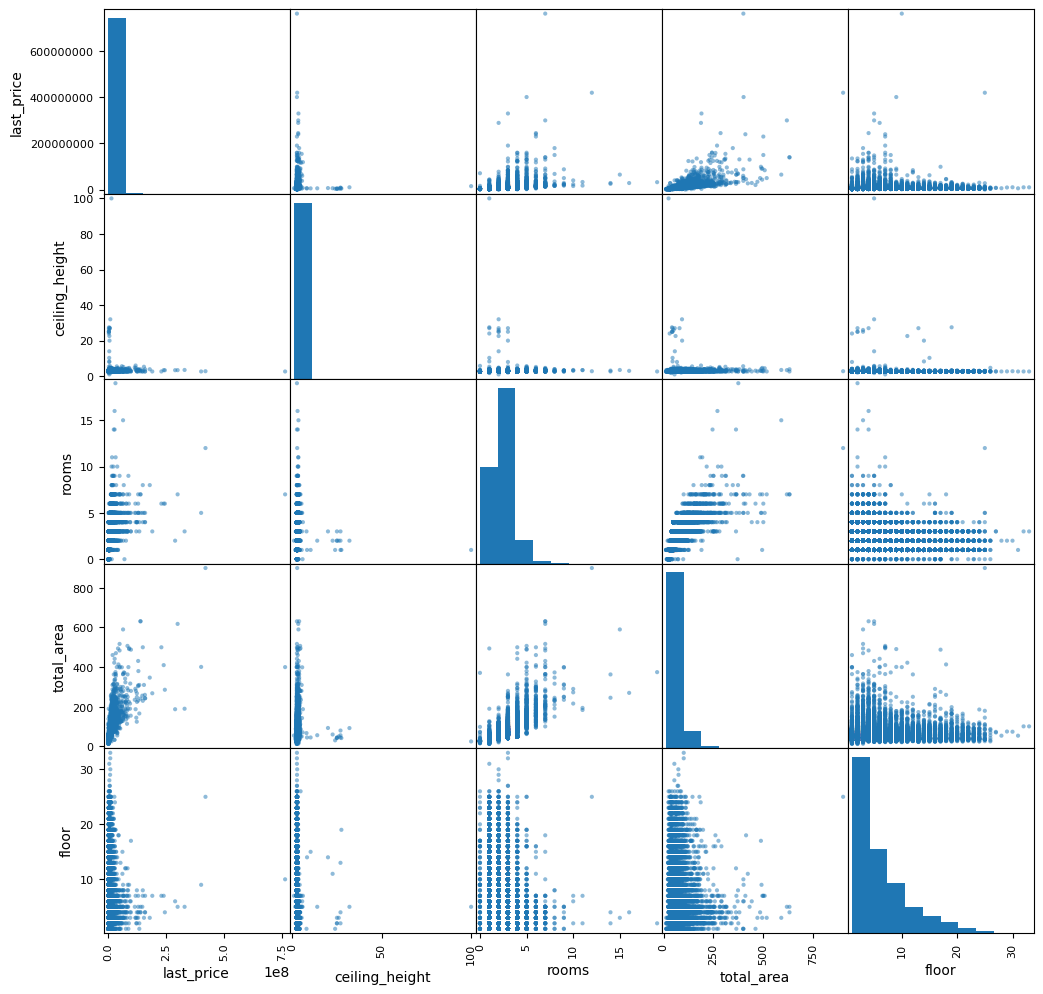

In [68]:
corr_table = data_spb[['last_price','ceiling_height','rooms','total_area','floor']]
pd.plotting.scatter_matrix(corr_table, figsize=(12,12))
display(corr_table.corr())

Conclusion. The cost of an apartment is affected by its total area. At the same time, the floors and ceiling height do not affect the cost of the apartment.

Let's check the impact on the cost of the apartment of the number of rooms, floor, distance from the center and the date of placement of the ad

,last_price,cityCenters_nearest,floor,rooms,first_day_exposition
last_price,1.000000,-0.259220,-0.000586,0.372108,-0.046201
cityCenters_nearest,-0.259220,1.000000,0.227782,-0.294018,0.090851
floor,-0.000586,0.227782,1.000000,-0.161592,0.015883
rooms,0.372108,-0.294018,-0.161592,1.000000,-0.066160
first_day_exposition,-0.046201,0.090851,0.015883,-0.066160,1.000000


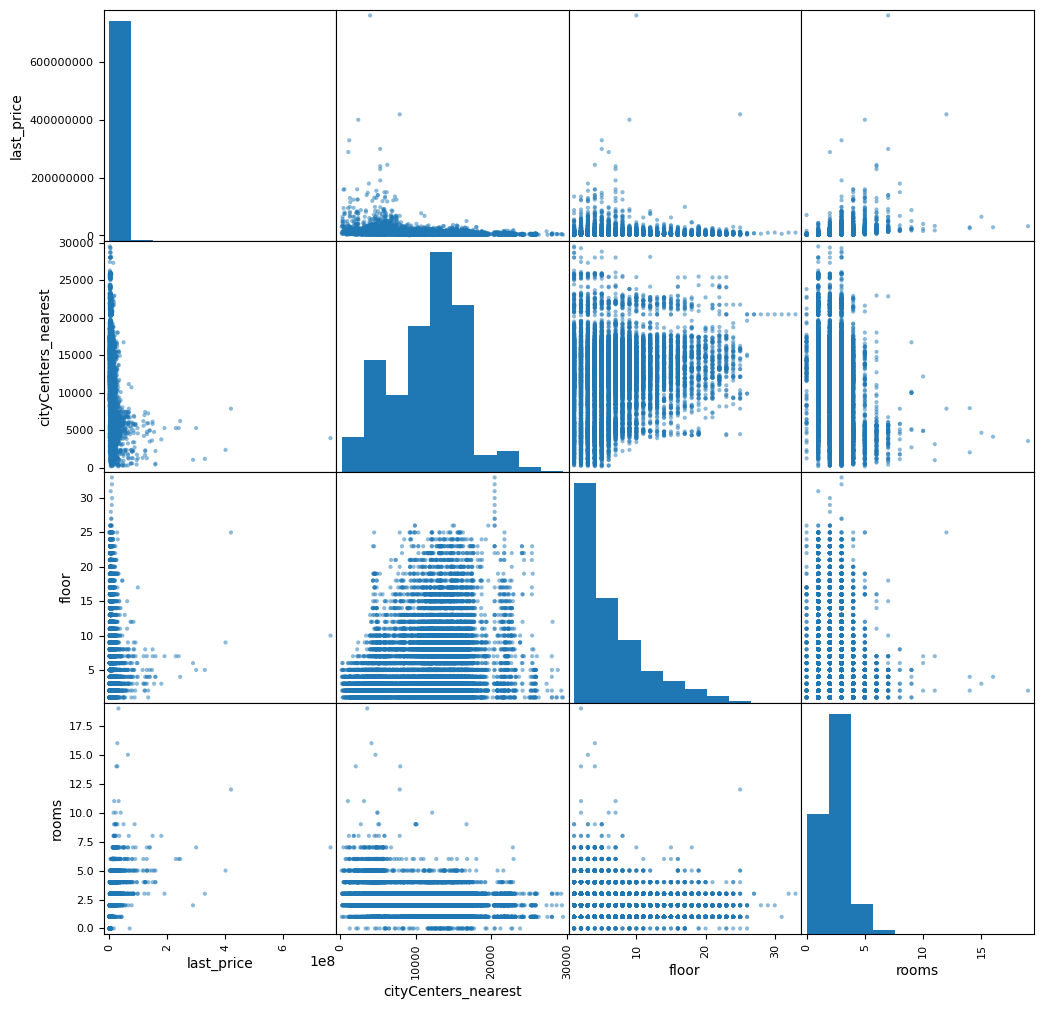

In [69]:
corr_table_2 = data_spb[['last_price','cityCenters_nearest','floor','rooms','first_day_exposition']]
pd.plotting.scatter_matrix(corr_table_2, figsize=(12,12))
display(corr_table_2.corr())

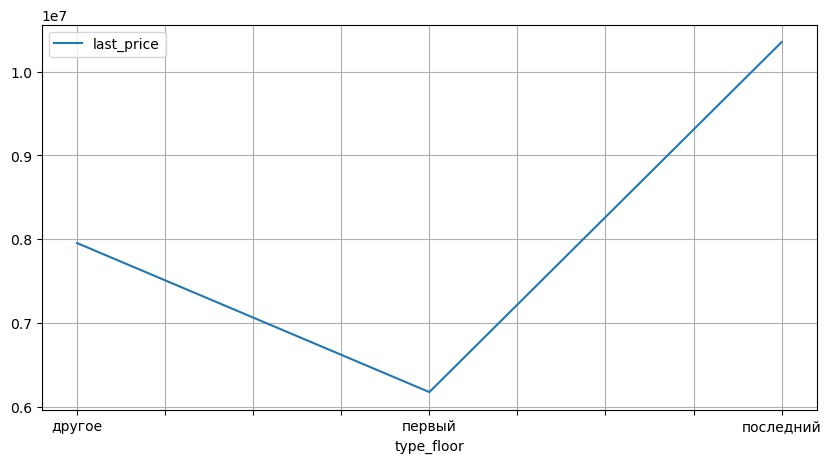

In [70]:
(
    data_spb.pivot_table(index='type_floor', values='last_price')
    .plot(grid=True, figsize=(10, 5))
) 

plt.show()

The price of an apartment is affected by the number of rooms (the more of them, the higher the price). Also, the closer the apartment is to the center, the more expensive it is. At the same time, the apartments on the ground floor are also the cheapest.

## Results of the research

1) The largest number of ads for the sale of real estate are placed in St. Petersburg. Least of all in the region in towns/villages and villages.

2) The most expensive real estate is represented in Санкт-Петербург.

3) The center of Санкт-Петербург is an area with a radius of about 7 kilometers.

4) Common factors for Санкт-Петербург and the region that affect the cost of real estate: total area (the larger the area, the higher the price), distance from the center of Санкт-Петербург (the closer to the center, the more expensive).

5) The property on the 1st floor has the lowest price.

6) Since 2014, there has been a trend towards a decrease in the average price of real estate.